In [2]:
import pandas as pd
print(pd)
import matplotlib.pyplot as plt

<module 'pandas' from 'C:\\Users\\Shree\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>


In [29]:
file_path= 'transactions.csv'
df = pd.read_csv(file_path)
print(df)

        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0          1   PAYMENT    9839.64  C1231006815       170136.0       160296.36   
1          1   PAYMENT    1864.28  C1666544295        21249.0        19384.72   
2          1  TRANSFER     181.00  C1305486145          181.0            0.00   
3          1  CASH_OUT     181.00   C840083671          181.0            0.00   
4          1   PAYMENT   11668.14  C2048537720        41554.0        29885.86   
...      ...       ...        ...          ...            ...             ...   
199995    13   CASH_IN  149024.27  C1446913085         8688.0       157712.27   
199996    13   PAYMENT   71076.01  C1421983410        50291.0            0.00   
199997    13  CASH_OUT  147125.05    C80624764            0.0            0.00   
199998    13  CASH_OUT   97529.67   C595001108            0.0            0.00   
199999    13  CASH_OUT  211748.46  C2048647654       496279.0       284530.54   

           nameDest  oldbal

In [5]:
column_names = df.columns.tolist()
print(column_names)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [6]:
k=5
first_k_rows = df.head(k)
print(first_k_rows)

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [7]:
k=10
random_sample = df.sample(n=k)
print(random_sample)

        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
37167      9  CASH_OUT   96461.10   C633264459       48910.00            0.00   
198159    13   PAYMENT   24723.33  C1711741024       11271.00            0.00   
131654    11   CASH_IN  121153.43   C228822090     2286198.04      2407351.47   
81946     10   PAYMENT    6568.40   C306255972      713597.00       707028.60   
115867    11   CASH_IN   68462.79  C1262462971     1565994.35      1634457.13   
190786    13   PAYMENT   21221.37   C909822069       65028.00        43806.63   
52745      9  CASH_OUT  196595.78   C389351286           0.00            0.00   
148411    12  CASH_OUT  335150.68   C878374967       74563.00            0.00   
133361    11  CASH_OUT  242069.62   C674757646         190.00            0.00   
97400     10   PAYMENT   22639.23   C113673945           0.00            0.00   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
37167    C749672494      3083

In [9]:
unique_transaction_types = df['type'].unique()
print(unique_transaction_types)


['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [10]:
top_destinations = df['nameDest'].value_counts().head(10)
print(top_destinations)

nameDest
C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: count, dtype: int64


In [19]:
fraud_rows = df[df['isFraud'] == 1]
print(fraud_rows)

        step      type      amount     nameOrig  oldbalanceOrg  \
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
251        1  TRANSFER     2806.00  C1420196421        2806.00   
252        1  CASH_OUT     2806.00  C2101527076        2806.00   
680        1  TRANSFER    20128.00   C137533655       20128.00   
...      ...       ...         ...          ...            ...   
182862    13  CASH_OUT      408.00  C1894004688         408.00   
193765    13  TRANSFER    48375.02   C920803432       48375.02   
193766    13  CASH_OUT    48375.02  C1894578299       48375.02   
196775    13  TRANSFER  4022667.54   C735463888     4022667.54   
196776    13  CASH_OUT  4022667.54    C79951219     4022667.54   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                  0.0   C553264065            0.00            0.00        1   
3                  0.0    C38997010        2118

In [21]:
result_df = df.groupby('nameOrig')['nameDest'].nunique().reset_index(name='unique_destinations_count')
result_df = result_df.sort_values(by='unique_destinations_count', ascending=False)
print(result_df)

           nameOrig  unique_destinations_count
173368   C745009740                          2
122825   C260230637                          2
142013    C44568807                          2
73007   C1709295811                          2
133325   C361604284                          1
...             ...                        ...
66667   C1648185402                          1
66668   C1648194899                          1
66669   C1648216508                          1
66670   C1648222711                          1
199995   C999983894                          1

[199996 rows x 2 columns]


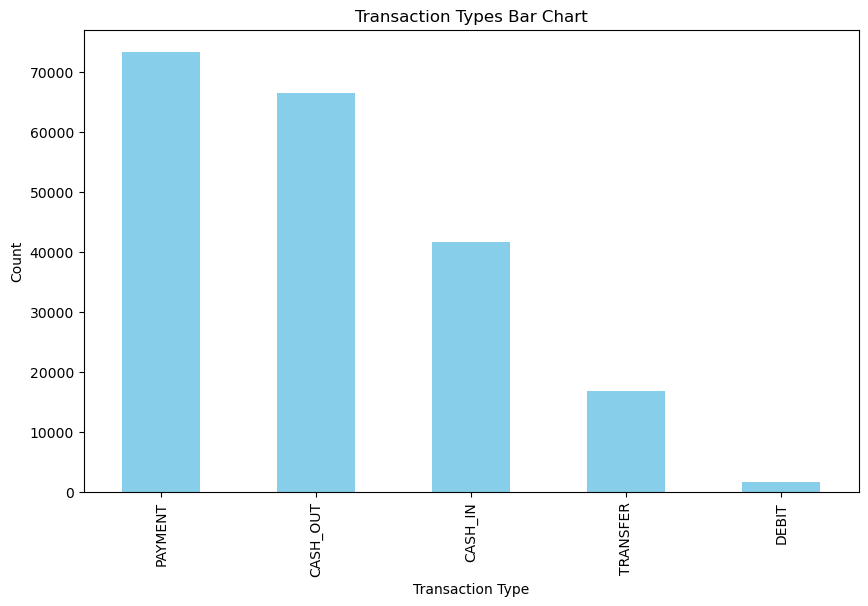

In [22]:
transaction_types_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
transaction_types_counts.plot(kind='bar', color='skyblue')
plt.title('Transaction Types Bar Chart')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

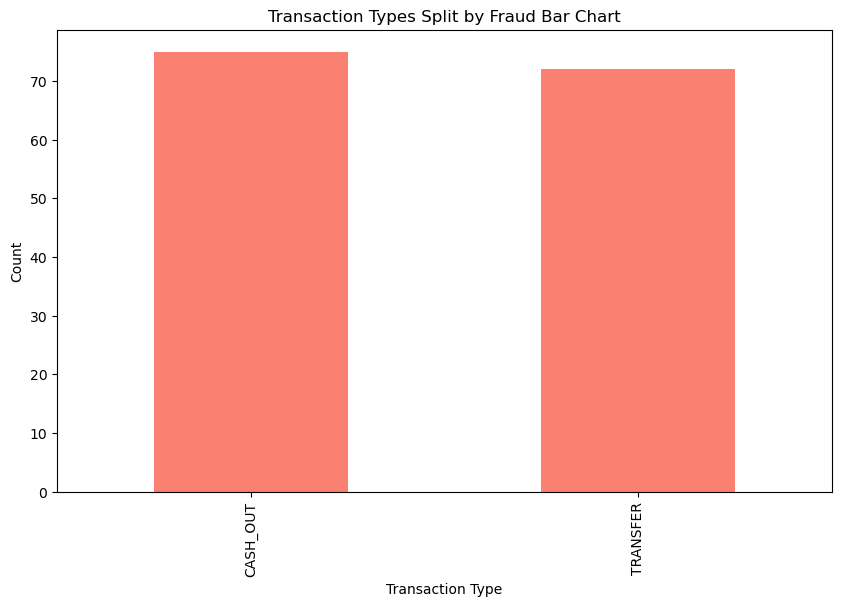

In [24]:
fraud_transaction_types_counts = df[df['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(10, 6))
fraud_transaction_types_counts.plot(kind='bar', color='salmon')
plt.title('Transaction Types Split by Fraud Bar Chart')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

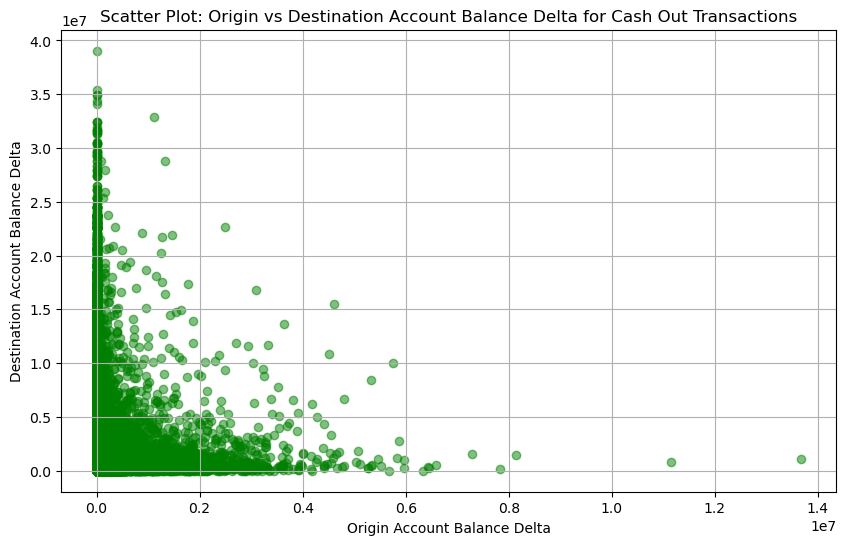

In [27]:
cash_out_df = df[df['type'] == 'CASH_OUT']
plt.figure(figsize=(10, 6))
plt.scatter(cash_out_df['newbalanceOrig'], cash_out_df['newbalanceDest'], alpha=0.5, color='green')
plt.title('Scatter Plot: Origin vs Destination Account Balance Delta for Cash Out Transactions')
plt.xlabel('Origin Account Balance Delta')
plt.ylabel('Destination Account Balance Delta')
plt.grid(True)
plt.show()